## Weather system CNN 

## Script Content
### 1. Importing Libraries & Dataset


## 1. Importing Libraries & Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

2025-08-13 22:05:57.091900: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# download the weather images and put them in a directory
path = r'/Users/tanu/Desktop/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [6]:
# load the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 2. Prepare CNN Model

In [8]:
# create CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [9]:
#compile and run the model

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 32, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5245 - loss: 0.1351 - val_accuracy: 0.7188 - val_loss: 0.0850
Epoch 2/32
 2/27 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7031 - loss: 0.0934

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.6562 - loss: 0.0969 - val_accuracy: 0.6823 - val_loss: 0.0907
Epoch 3/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7049 - loss: 0.0968 - val_accuracy: 0.6510 - val_loss: 0.1172
Epoch 4/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.6562 - loss: 0.1042 - val_accuracy: 0.6354 - val_loss: 0.1017
Epoch 5/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7419 - loss: 0.0835 - val_accuracy: 0.7760 - val_loss: 0.0828
Epoch 6/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.8438 - loss: 0.0652 - val_accuracy: 0.8125 - val_loss: 0.0704
Epoch 7/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8088 - loss: 0.0674 - val_accuracy: 0.7240 - val_loss: 0.1071
Epoch 8/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8125 - loss: 0.0610 - val_accuracy: 0.7760 - val_loss: 0.0728
Epoch 9/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8044 - loss: 0.0739 - val_accuracy: 0.7656 - val_loss: 0.

In [10]:
results = pd.DataFrame(model.history.history)

## 3. Model Evaluation

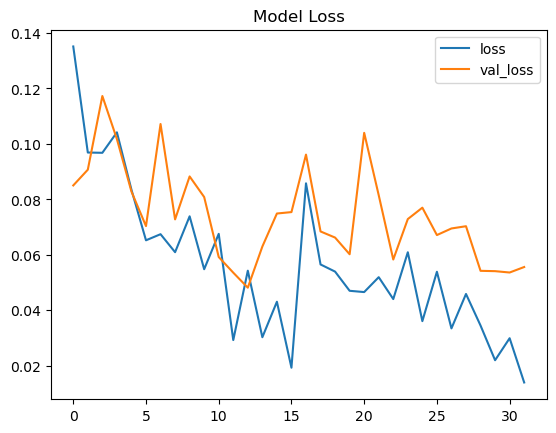

In [12]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

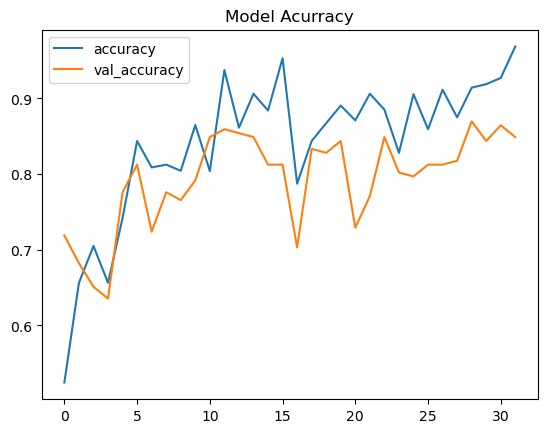

In [13]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [14]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 0.8489583134651184
Loss: 0.014004776254296303, Val_Loss: 0.055613089352846146


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step


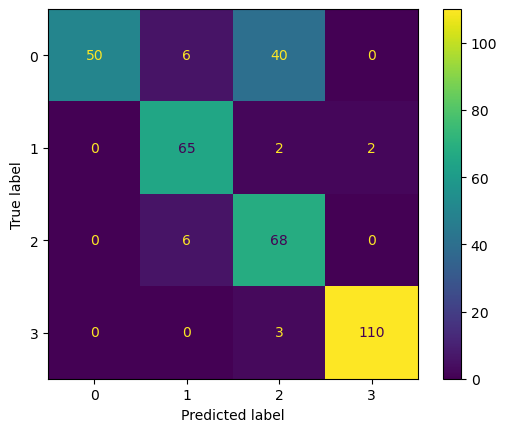

In [15]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


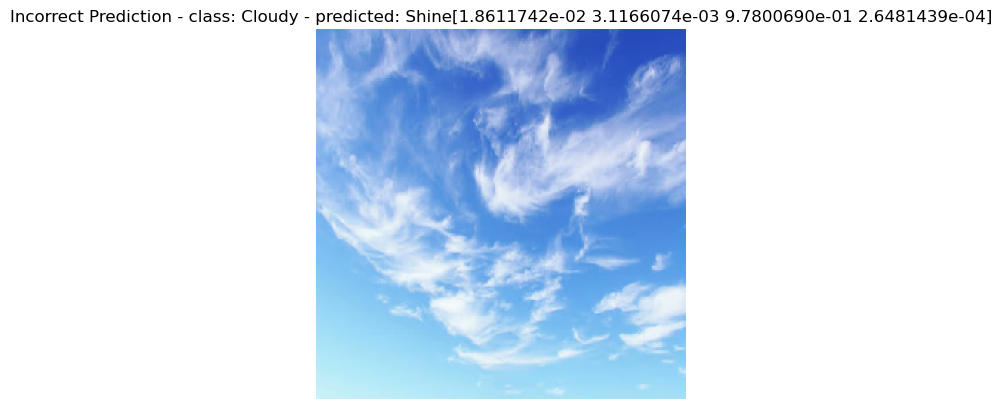

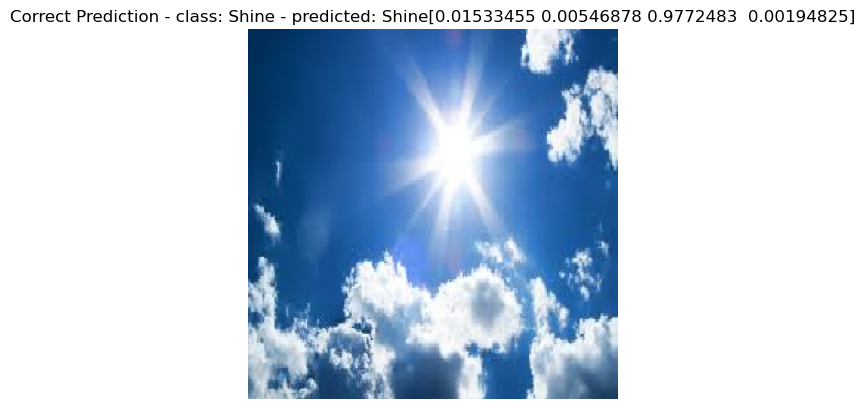

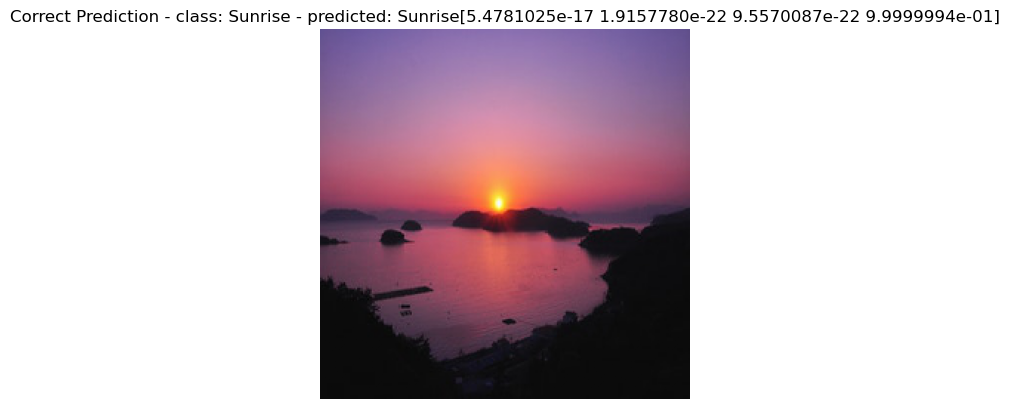

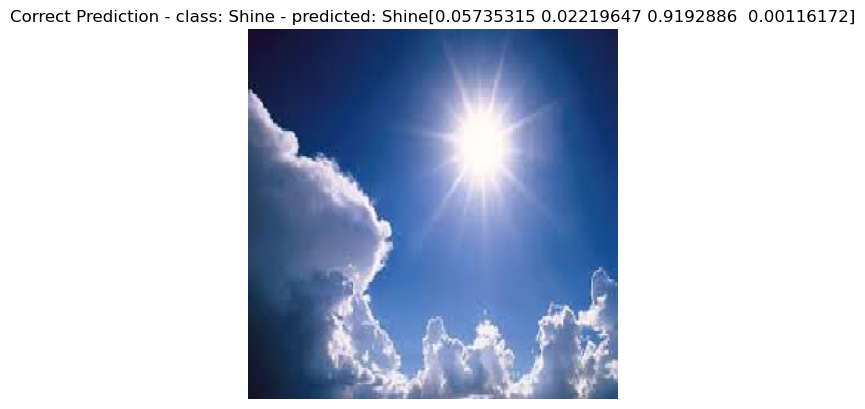

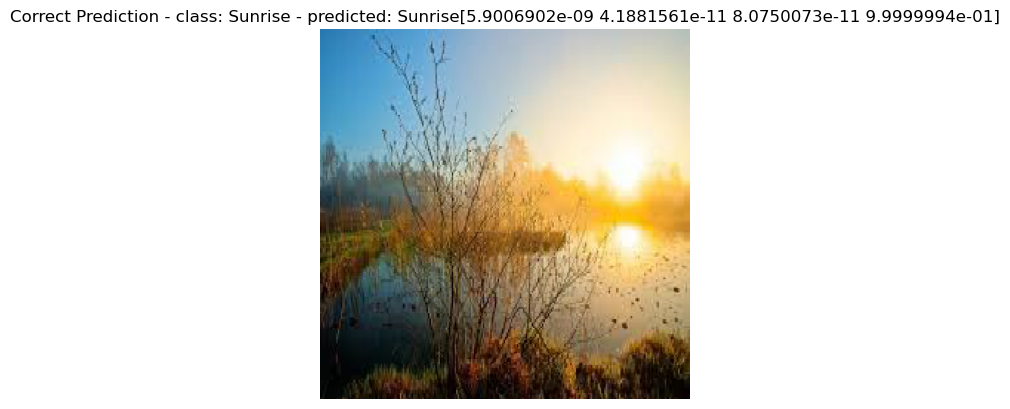

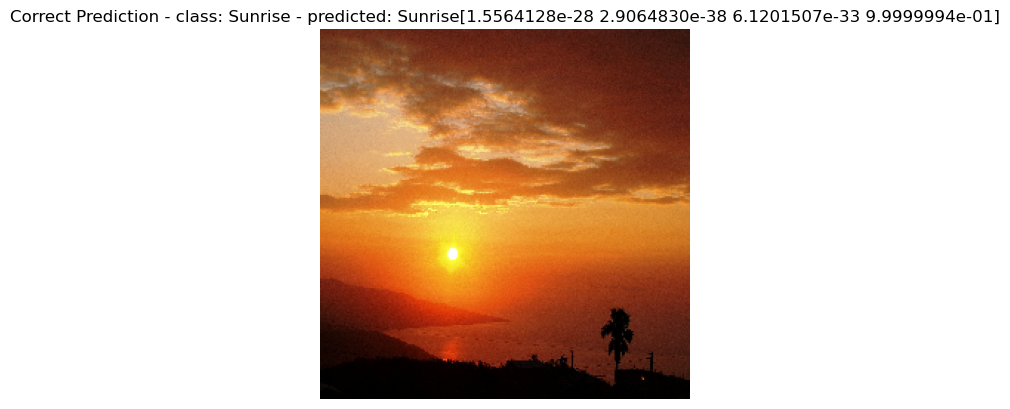

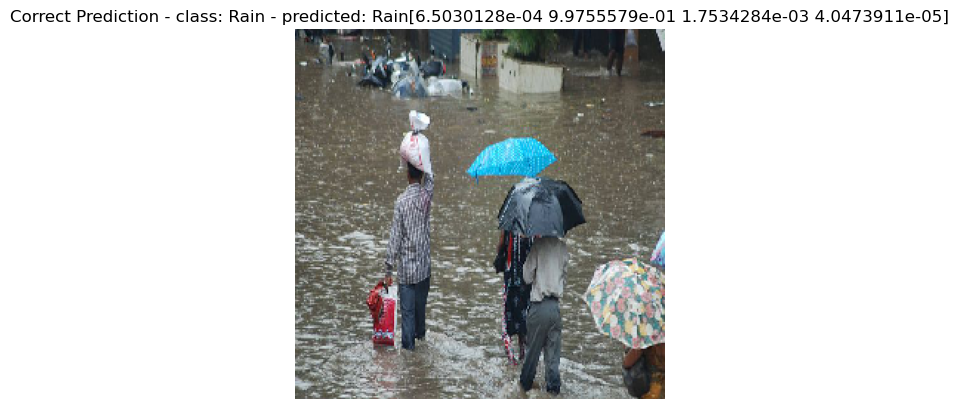

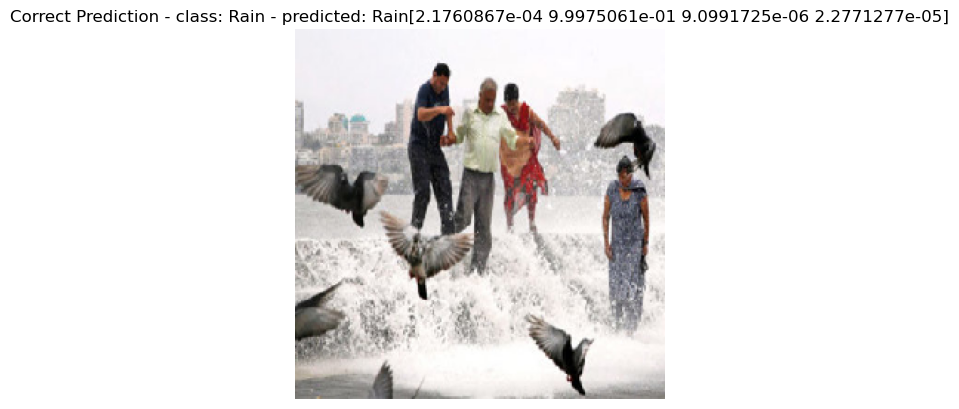

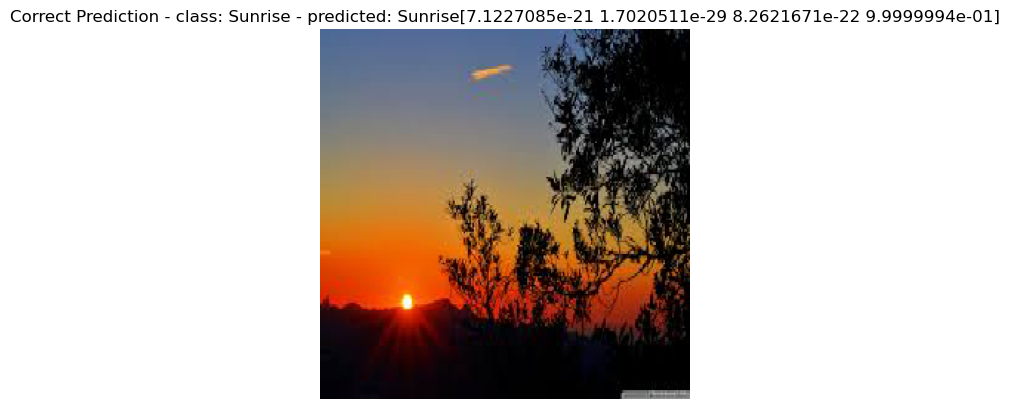

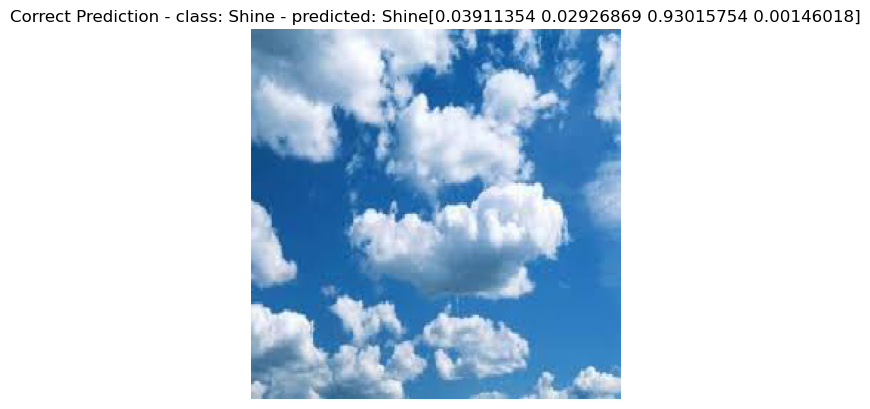

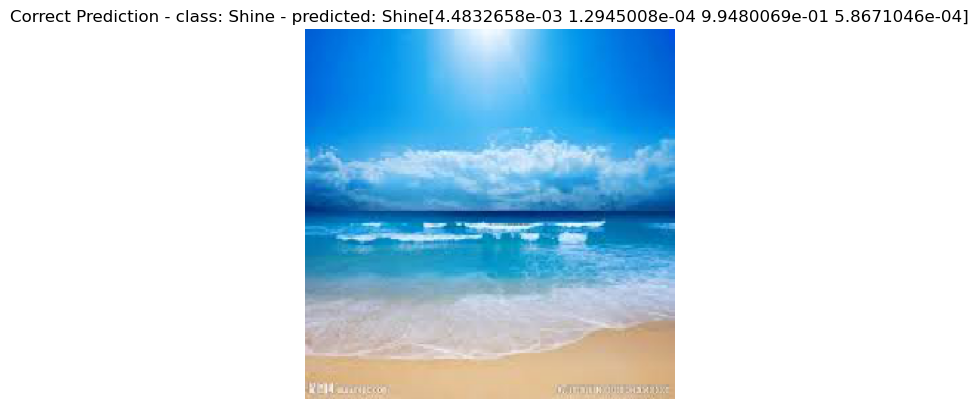

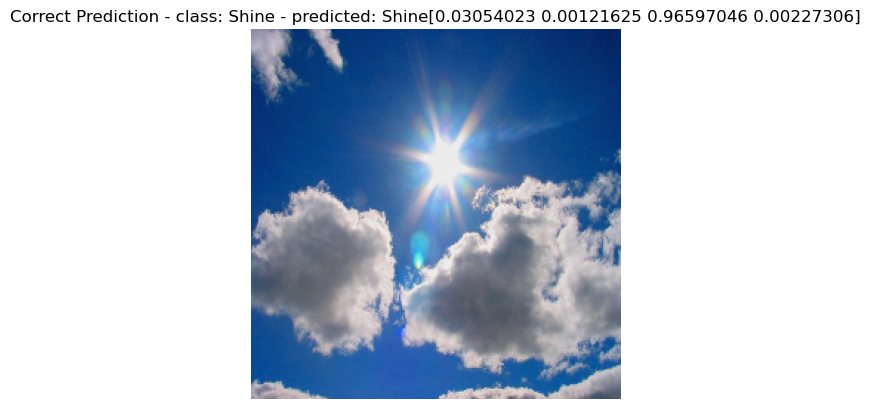

In [17]:
predict_one(model, 12) #<--you can show multiple pictures with this command. Just fill in the number you want to see.